This project was envisioned to create a portfolio optimization tool which can be used by quant developers or 
traders working in finance, daily, to crawl 'fresh' stock prices from the internet and create a portfolio. To 
create(test, develop, train) the SARIMAX-LSTM model, 150 S&P500 firms were randomly selected which constitued 
portfolio of 150 companies used to train, develop and test the hybrid SARIMAX-LSTM Model. Purpose of this Jupyter 
notebook is to extract 10 companies which are not included in the orignal portfolio of 150 companies and run 
SARIMAX in conjunction with the selected LSTM model (.h5 model) to obtain the results for these assets and create
a new portfolio. A smaller data set comprising of 180 stock prices for these companies will be used for predictions. This module serves 2 purposes :

1. This can be used to recheck the correctness criterion of the model.
2. Can be used to compute prediction values based on the new data colleted everyday. All one needs to do is run this module in conjunction with Data Scraping and Data Processing module to crawl and collect up to date stock data and make predictions based on that.

NOTE : Please run this module after models are generated from ARIMAX-LSTM module.

Cell contains library and objects import which would be required to run the module.

In [1]:
#Cell 1 - Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from pmdarima.arima import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1_l2
from matplotlib.pyplot import figure
import warnings
warnings.simplefilter("ignore")

Using TensorFlow backend.


Code In cell 2 preprocesses the data by selecting stocks other than the orignally selected 150 stocks
to pass on to the SARIMAX module.

In [2]:
#Functions to generate correlation. Used in cell 2.

def get_correlation(item1, item2):
    
    stockdf = pd.read_csv("/Users/gauravthapliyal/Desktop/Project Data/stock_pricefrom2010.csv")
    pd.to_datetime(stockdf['Date'], format='%Y-%m-%d')
    stockdf = stockdf.set_index(pd.DatetimeIndex(stockdf['Date']))
    value_pair = pd.concat([stockdf[item1], stockdf[item2]], axis=1)
    value_pair.columns = [item1, item2]
    correlationdf = value_pair[item1].rolling(window=100).corr(value_pair[item2])
    return correlationdf

def get_corr_matrix(rand_assets):
    
    data = []
    for i in range(len(rand_assets)):
        for j in range(len(rand_assets)-1-i):
            temp1 = rand_assets[i]
            temp2 = rand_assets[9-j]
            series_data = get_correlation(temp1,temp2)[99:]
            stride_data = list(series_data[[100*k for k in range(24)]])
            data.append(stride_data)
    return data
    

In [3]:
#Cell 2 - Data Pre Processing Module

ORIGNAL_PORTFOLIO = ['FRT', 'AMD', 'MOS', 'DVN', 'RE', 'INTU', 'STE', 'JKHY', 'EXR', 'ZBRA', 'CMI', 'AMP', 'VNO', 'EMN', 'HSY', 'DAL', 'EQIX', 'ADP', 'PPL', 'LKQ', 'MS', 'EW', 'PPG', 'TSCO', 'MYL', 'XRX', 'VLO', 'JBHT', 'HPQ', 'FTI', 'FAST', 'AVGO', 'CVX', 'DGX', 'MGM', 'NVR', 'GE', 'LYV', 'REGN', 'AAL', 'PWR', 'RHI', 'EMR', 'ALL', 'HUM', 'CPRT', 'NLOK', 'CF', 'NVDA', 'HD', 'MRO', 'CMCSA', 'MET', 'MAR', 'DISCA', 'SLG', 'URI', 'RL', 'FLS', 'BAC', 'NEE', 'CAT', 'DG', 'PCAR', 'DLR', 'NI', 'GILD', 'O', 'TEL', 'ESS', 'DLTR', 'GS', 'ALK', 'KSS', 'NOV', 'UNP', 'ES', 'HAL', 'GLW', 'TAP', 'SPGI', 'CVS', 'IPG', 'UNH', 'WYNN', 'PXD', 'IEX', 'DIS', 'ROP', 'MKTX', 'NEM', 'LDOS', 'HOG', 'CNC', 'TJX', 'AMAT', 'MDT', 'PVH', 'AKAM', 'INCY', 'TROW', 'HWM', 'ULTA', 'KR', 'AAPL', 'PNC', 'BDX', 'ADM', 'AJG', 'BXP', 'SRE', 'VZ', 'NTRS', 'HON', 'BEN', 'TRV', 'HAS', 'CCI', 'FIS', 'FFIV', 'KEY', 'CTSH', 'IDXX', 'DRE', 'DISH', 'MSI', 'ADS', 'CDNS', 'ADI', 'AOS', 'KLAC', 'HRB', 'KMX', 'ISRG', 'EL', 'GOOGL', 'ARE', 'PEP', 'CTL', 'EXC', 'TGT', 'HIG', 'ROL', 'COO', 'CI', 'SBAC', 'BKNG', 'GWW', 'WY', 'RJF']
df = pd.read_csv("/Users/gauravthapliyal/Desktop/Project Data/stock_pricefrom2010.csv")
SP500 = list(df.columns.values[1:])
SP500.pop()
selected_companies = list(set(SP500)-set(ORIGNAL_PORTFOLIO))

random.shuffle(selected_companies)
random.seed(1)
rand_assets = selected_companies[:10].copy()
print(rand_assets)

corr_matrix = get_corr_matrix(rand_assets)

processed_data = {}
for i in range(len(corr_matrix)):
    processed_data[str(i)] = corr_matrix[i]
processed_df = pd.DataFrame(processed_data)

pre_arima = []
for i in range(45):
    pre_arima.append(processed_df[str(i)][:21])
    pre_arima.append(processed_df[str(i)][1:22])
    pre_arima.append(processed_df[str(i)][2:23])
    pre_arima.append(processed_df[str(i)][3:])

    
pre_arima = pd.DataFrame(np.array(pre_arima))
pre_arima.to_csv('/Users/gauravthapliyal/Desktop/Project Data/train_dev_test/Pre_SARIMAX/new_asset_before_sarimax.csv')



['PKI', 'ANSS', 'ZBH', 'EOG', 'PGR', 'ETN', 'BAX', 'AIV', 'SWKS', 'MO']


Collects preprocessed data from module 2 and runs SARIMAX model to generate residual values and derive the linear
tendencies from the data.

In [4]:
#Cell 3 - SARIMAX Module

dataset = pd.read_csv('/Users/gauravthapliyal/Desktop/Project Data/train_dev_test/Pre_ARIMA/new_asset_before_arima.csv')
dataset = dataset.loc[:,~dataset.columns.str.contains('Unnamed')]

#Different models bases on AR I and MA values. Seasonal order adds extra AR I MA regression values.
#Seasonal order also adds m value, which in our case is 12

model_110 = ARIMA(order=(1,1,0), seaasonal_order=(1, 1, 0, 12), mle_regression=True, suppress_warnings=True)
model_011 = ARIMA(order=(0,1,1), seaasonal_order=(0, 1, 1, 12), mle_regression=True, suppress_warnings=True)
model_111 = ARIMA(order=(1,1,1), seaasonal_order=(1, 1, 1, 12), mle_regression=True, suppress_warnings=True)
model_211 = ARIMA(order=(2,1,1), seaasonal_order=(2, 1, 1, 12), mle_regression=True, suppress_warnings=True)
model_210 = ARIMA(order=(2,1,0), seaasonal_order=(2, 1, 0, 12), mle_regression=True, suppress_warnings=True)

#Iteratively fit AR, I, MA values for different models. Try/except functionality is used to keep the system going
#even if a single value fails.

flag = 0
c=0
residual = []
for s in np.array(dataset):
    c+=1
    try:
        model1 = model_110.fit(s)
        model = model1

        try:
            model2 = model_011.fit(s)

            if model.aic() <= model2.aic() :
                pass
            else :
                model = model2

            try :
                model3 = model_111.fit(s)
                if model.aic() <= model3.aic() :
                    pass
                else :
                    model = model3
            except :
                try:
                    model4 = model_211.fit(s)

                    if model.aic() <= model4.aic() :
                        pass
                    else:
                        model = model4
                except:
                    try:
                        model5 = model_210.fit(s)

                        if model.aic() <= model5.aic():
                            pass
                        else :
                            model = model5
                    except :
                        pass

        except:
            try:
                model3 = model_111.fit(s)

                if model.aic() <= model3.aic() :
                    pass
                else :
                    model = model3
            except :
                try:
                    model4 = model_211.fit(s)

                    if model.aic() <= model4.aic() :
                        pass
                    else:
                        model = model4
                except:
                    try:
                        model5 = model_210.fit(s)

                        if model.aic() <= model5.aic():
                            pass
                        else :
                            model = model5
                    except :
                        pass

    except:
        try:
            model2 = model_011.fit(s[i])
            model = model2

            try :
                model3 = model_111.fit(s[i])

                if model.aic() <= model3.aic():
                    pass
                else:
                    model = model3
            except :
                try:
                    model4 = model_211.fit(s[i])

                    if model.aic() <= model4.aic() :
                        pass
                    else:
                        model = model4
                except:
                    try:
                        model5 = model_210.fit(s[i])

                        if model.aic() <= model5.aic():
                            pass
                        else :
                            model = model5
                    except :
                        pass

        except :
            try:
                model3 = model_111.fit(s[i])
                model = model3
            except :
                try:
                    model4 = model_211.fit(s[i])

                    if model.aic() <= model4.aic() :
                        pass
                    else:
                        model = model4
                except:
                    try:
                        model5 = model_210.fit(s[i])

                        if model.aic() <= model5.aic():
                            pass
                        else :
                            model = model5
                    except :
                        flag = 1
                        print(str(c) + "Error While fitting SARIMAX model. Unable to continue.")
                        break

                        
    predictions = list(model.predict_in_sample())
    predictions = [np.mean(predictions)] + predictions

    res = model.resid()
    residual.append(np.array(res))
    

    if flag == 1:
        break
residual = pd.DataFrame(residual)
residual.to_csv('/Users/gauravthapliyal/Desktop/Project Data/train_dev_test/Post_SARIMAX/new_asset_after_sarimax.csv')

Code in the cell 4 collects residual data generated by the SARIMAX model in the previous step and runs the 
appropriate model for the neural network. Final score is generated and predictions are also plotted using the code
written in this cell.

180/180 [==============================] - 0s 620us/step
SCORE :
 LOSS - 0.0135
 MEAN SQUARED ERROR - 0.0135
 MEAN ABSOLUTE ERROR - 0.0517


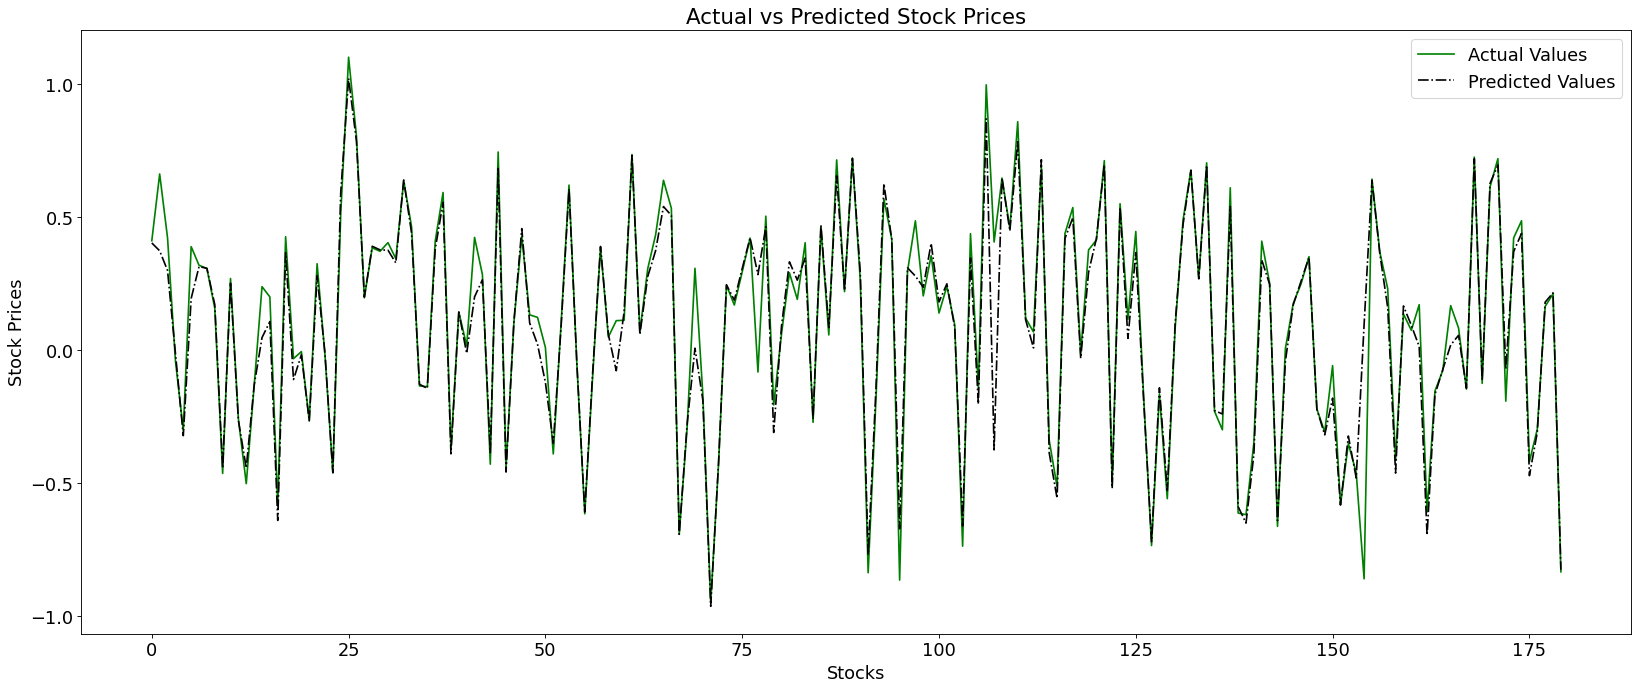

In [5]:
#Cell 4 - Neural Network Module

plt.rcParams.update({'font.size': 16})
dataset = pd.read_csv('/Users/gauravthapliyal/Desktop/Project Data/train_dev_test/Post_SARIMAX/new_asset_after_sarimax.csv')
dataset = dataset.loc[:,~dataset.columns.str.contains('^Unnamed')]
X = dataset.loc[:,~dataset.columns.str.contains('20')]
Y = dataset.loc[:,dataset.columns.str.contains('20')]

X = np.asarray(X).reshape(180,20,1)
Y = np.asarray(Y).reshape(180,1)


#Activation Function
class Double_Tanh(Activation):
    def __init__(self, activation, **kwargs):
        super(Double_Tanh, self).__init__(activation, **kwargs)
        self.__name__ = 'double_tanh'

def double_tanh(x):
    return (K.tanh(x) * 2)

get_custom_objects().update({'double_tanh':Double_Tanh(double_tanh)})


#Evaluate model to get predictions/score . 
model = load_model('/Users/gauravthapliyal/Desktop/Project Data/LSTM-SARIMAX-models/hybrid_LSTM/epoch278.h5')
score = model.evaluate(X,Y)
print('SCORE :')
print(' LOSS - ' + str(np.round(score[1],4)))
print(' MEAN SQUARED ERROR - ' + str(np.round(score[1],4)))
print(' MEAN ABSOLUTE ERROR - ' + str(np.round(score[2], 4)))

pred = model.predict(np.asarray(X))

#Plot predictions
e1 = Y.flatten()
p1 = pred.flatten()
figure(num=None, figsize=(25, 10), dpi=80, facecolor='w', edgecolor='k')
#plt.scatter(e1, p1, color = "brown", s=5)
plt.plot(e1, color = "green", label = 'Actual Values')
plt.plot(p1,'-.', color = "black", label = 'Predicted Values')
plt.legend(loc="upper right")
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Stocks")
plt.ylabel("Stock Prices")
plt.show()